## 이진 분류 예제 - 영화 리뷰 분류
- 텍스트 기반으로 긍정/ 부정 분류
- IMDB 데이터셋

### IMDB 데이터셋 로드하기

In [ ]:
pip install -U tf-nightly-gpu

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [5]:
# 리뷰 데이터 하나를 원래 영어 단어로 바꾸는 법 확인

'word_ index는 단어와 정수 인덱스 매핑한 딕셔너리'
word_index = imdb.get_word_index() 

'정수 인덱스와 단어 매핑하도록 뒤집기'
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()] 
) 

'리뷰 디코딩 0,1,2 는 패딩, 문서시작, 사전에 없음을 위한 인덱스므로 3 제거'
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
len(train_data)

25000

### 데이터 준비

In [11]:
# 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1 # results[i] 에서 특정 인덱스 위치를 1로 만듦
  return results 

# 벡터로 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
# 레이블도 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 신경망 모델 만들기
- 16개의 hidden unit을 가진 2개의 hidden layer
- 리뷰 감정을 스칼라 값의 예측으로 출력하는 3번째 층

In [17]:
from keras import models
from keras import layers

# 모델 정의
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
from keras import optimizers
from keras import losses
from keras import metrics

# 모델 컴파일
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### 훈련 검증

In [22]:
# validation set 준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6005 - acc: 0.6895 - val_loss: 0.3974 - val_acc: 0.8660
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3286 - acc: 0.8999 - val_loss: 0.3091 - val_acc: 0.8877
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2338 - acc: 0.9303 - val_loss: 0.2980 - val_acc: 0.8820
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1809 - acc: 0.9436 - val_loss: 0.2832 - val_acc: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1453 - acc: 0.9567 - val_loss: 0.2987 - val_acc: 0.8816
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1198 - acc: 0.9666 - val_loss: 0.2880 - val_acc: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1039 - acc: 0.9698 - val_loss: 0.3081 - val_acc: 0.8820
Epoch 8/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0851 - a

In [25]:
# model.fit()이 반환하는 history객체 확인
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

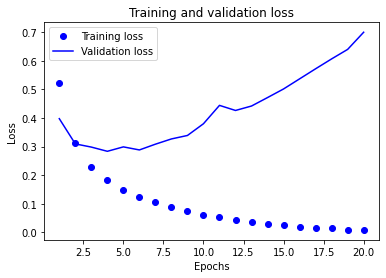

In [26]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss') # bo : 파란 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b : 파란 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

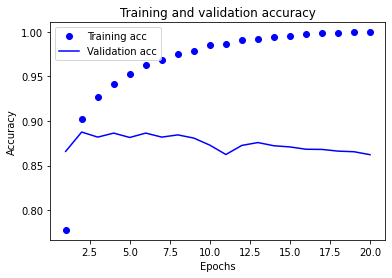

In [27]:
# 훈련과 검증 정확도 그리기

plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc') # bo : 파란 점
plt.plot(epochs, val_acc, 'b', label='Validation acc') # b : 파란 실선
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

두 번째 에폭 이후부터 오버피팅 된 것 확인

In [28]:
# 모델 처음부터 4에폭 동안만 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.5495 - binary_accuracy: 0.7396
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2678 - binary_accuracy: 0.9109
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1932 - binary_accuracy: 0.9360
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2920 - binary_accuracy: 0.8842


In [29]:
results

[0.2919889986515045, 0.8842399716377258]

### 새로운 데이터 예측

In [30]:
model.predict(x_test)

array([[0.19767174],
       [0.99994385],
       [0.9628027 ],
       ...,
       [0.20075616],
       [0.0859713 ],
       [0.70597357]], dtype=float32)